In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('data/position_anomalies.csv')
data.head()

,HASH5,LOAN_ID,CLIENT_ID,LOANAMOUNT,DISBURSEMENTDATE,POSITION,DISBURSED,DEFAULTED,DELAYED
0,s1010,URFW659,6419,280.0,2024-10-17 15:11:47.000,Municipal Accountant,1,0,1
1,ebzz2,RTHX279,6460,200.0,2024-05-30 09:51:40.000,Stylist,1,0,1
2,ebzw3,FINJ676,11316,280.0,2024-09-17 08:44:17.000,IT specialist,1,0,0
3,ebzxm,WMVU060,18498,150.0,2024-10-28 10:40:26.000,clothesline,1,0,1
4,ecny1,MUJL561,31156,280.0,2024-10-27 15:09:17.000,mason contractor,1,0,0


In [3]:
data['pos_len'] = data['POSITION'].str.len()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83222 entries, 0 to 83221
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HASH5             83222 non-null  object 
 1   LOAN_ID           83222 non-null  object 
 2   CLIENT_ID         83222 non-null  int64  
 3   LOANAMOUNT        83222 non-null  float64
 4   DISBURSEMENTDATE  83222 non-null  object 
 5   POSITION          79203 non-null  object 
 6   DISBURSED         83222 non-null  int64  
 7   DEFAULTED         83222 non-null  int64  
 8   DELAYED           83222 non-null  int64  
 9   pos_len           79203 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 6.3+ MB


In [5]:
import matplotlib.pyplot as plt

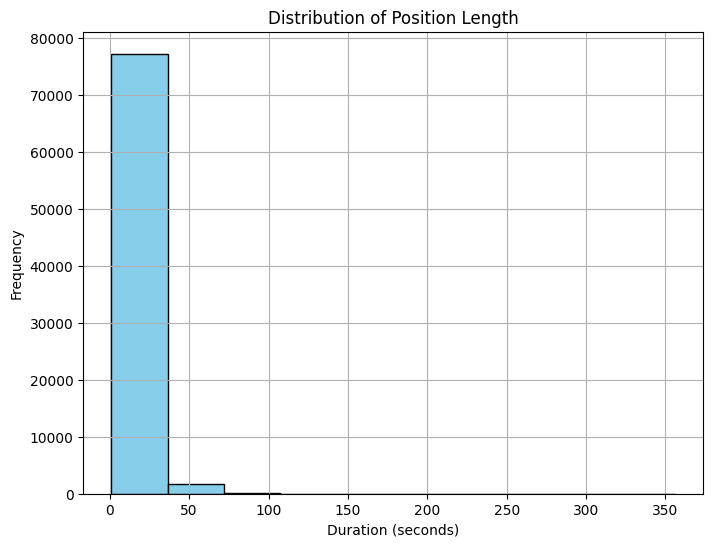

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['pos_len'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Position Length')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
len_bins = [0, 30, 60, 90, 120, 150]
len_labels = ['0-30', '30-60', '60-90', '90-120', '120-150']

data['pos_bin'] = pd.cut(data['pos_len'], bins=len_bins, labels=len_labels, right=False)

In [12]:
poslen_dr = data.groupby('pos_bin').agg(
    default_count=('DEFAULTED', 'sum'),
    total_count=('LOAN_ID', 'count')
)
poslen_dr['dr1'] = poslen_dr['default_count'] / poslen_dr['total_count']

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_38885/2521192380.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  poslen_dr = data.groupby('pos_bin').agg(


In [13]:
poslen_dr = poslen_dr.reset_index()
poslen_dr.head()

,pos_bin,default_count,total_count,dr1
0,0-30,13866,75381,0.183946
1,30-60,596,3379,0.176384
2,60-90,59,316,0.186709
3,90-120,9,61,0.147541
4,120-150,8,29,0.275862


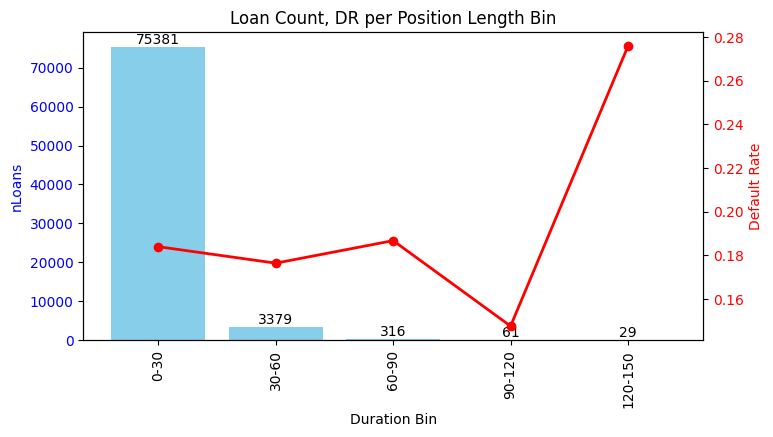

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(poslen_dr['pos_bin'], poslen_dr['total_count'], color='skyblue', label='Count')
ax1.set_xlabel('Duration Bin')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(poslen_dr['pos_bin'])
ax1.set_xticklabels(poslen_dr['pos_bin'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(poslen_dr['pos_bin'],poslen_dr['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

# Add a title
plt.title('Loan Count, DR per Position Length Bin')
plt.show()